<a href="https://colab.research.google.com/github/adityakuncara/Semester5-PVCK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 3
# Nama : Aditya Kuncara Bakti
# Kelas : TI-3A
# Absen : 04

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### formula g(x,y)=f(x,y)+b
###g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness

mengubah tingkat kecerahan sebuah citra
---------------------------------------
Masukkan nilai kecerahan50


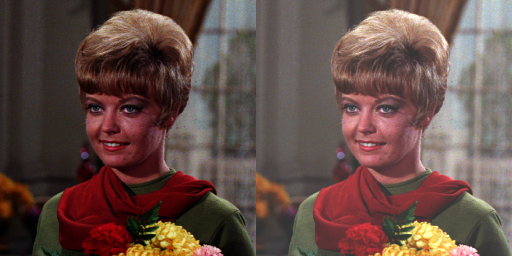

In [25]:

import cv2
from google.colab.patches import cv_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

print('mengubah tingkat kecerahan sebuah citra')
print('---------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan'))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original,beta=rightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

####1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


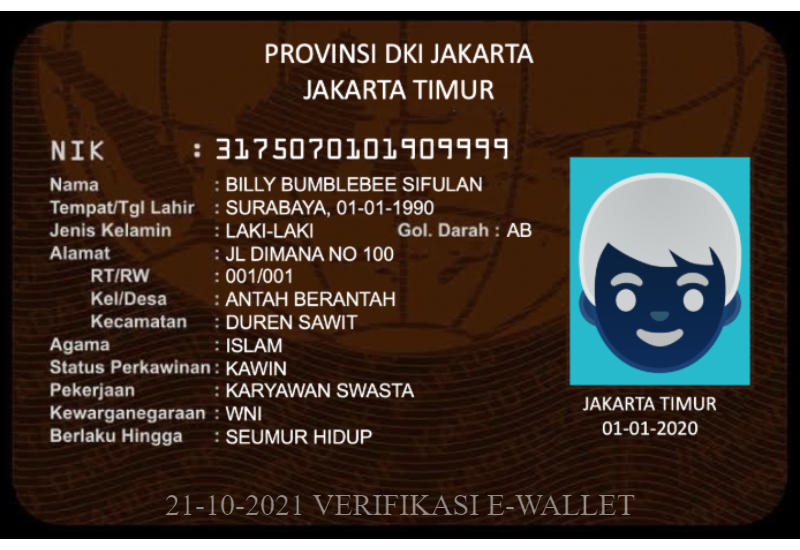

In [15]:
path = '/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png'
image = cv2.imread(path)
inverte = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            inverte[y,x,c] = np.clip(255 - image[y,x,c] ,0,255)
cv2_imshow(inverte)

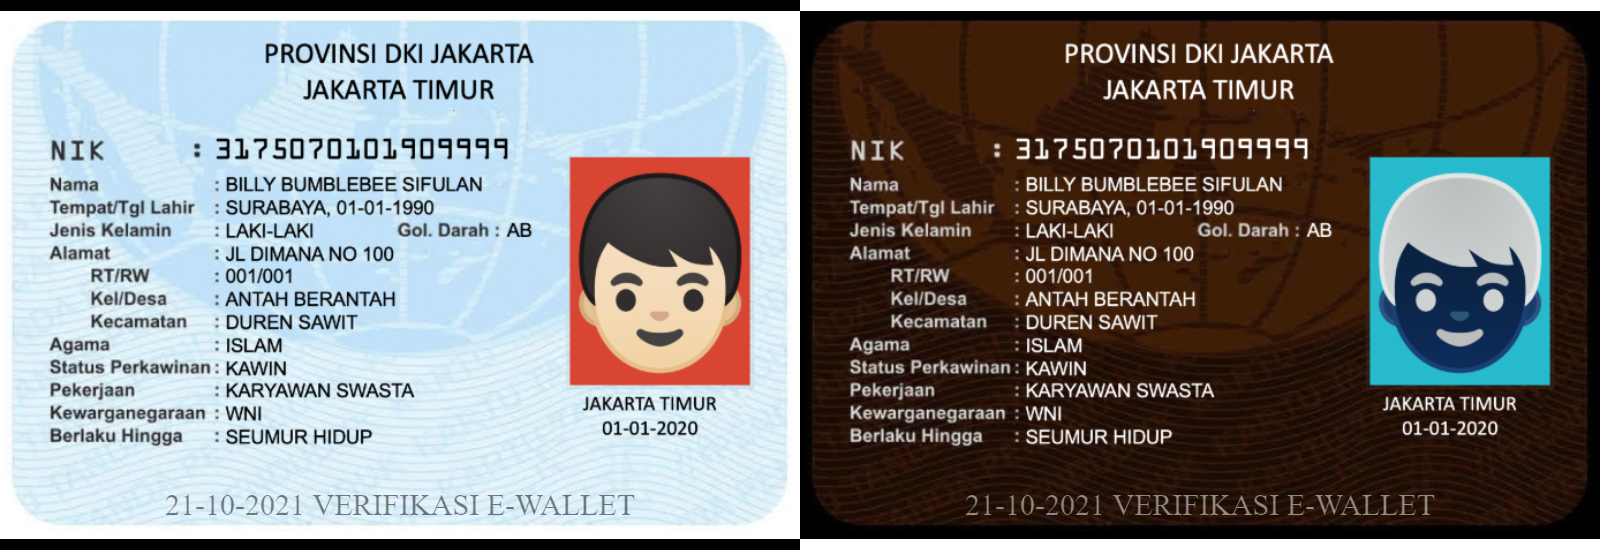

In [16]:
from IPython.utils import path
import cv2

path='/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png'
image = cv2.imread(path)
inverted_image = cv2.bitwise_not(image)

Invertedframe = cv2.hconcat((image, inverted_image))
cv2_imshow(Invertedframe)


####2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]:  50
Masukkan Kontras [1.0 - 3.0]:  2


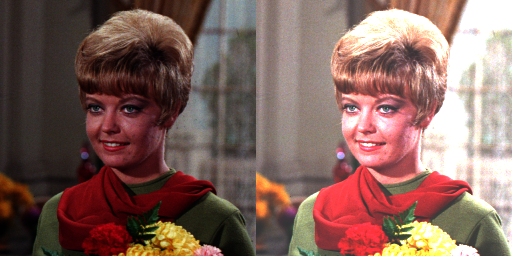

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]:  '))
  contrast = int(input('Masukkan Kontras [1.0 - 3.0]:  '))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat((original, contrast_image))
cv2_imshow(final_frame)


####3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Masukkan nilai kecerahan [-255 - 255]:  50


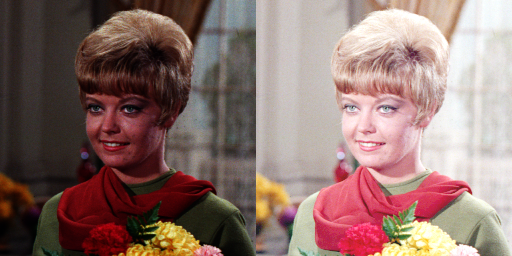

In [18]:
import numpy as np

def logaritmikBrightness(image,kecerahan):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
      for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            brightness_image[y,x,c] = np.clip(kecerahan * np.log(1 + original[y,x,c]), 0, 255)

  return brightness_image

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]:  '))
except ValueError:
  print('Error, not a number')

converted = logaritmikBrightness(original, brightness)

final_frame = cv2.hconcat((original, converted))
cv2_imshow(final_frame)

####4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
### Averaging

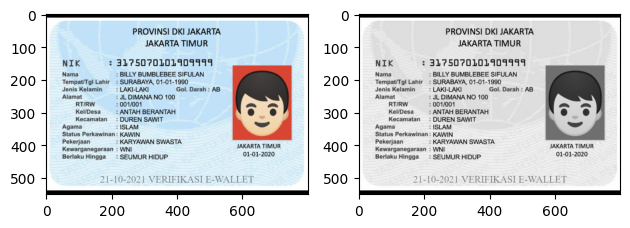

In [33]:
from cv2.gapi import BGR2RGB
image = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png')
grayAvg_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):

    # hitung rata-rata intensitas warna pada setiap chanel (R,G,B)
    r, g, b = image[y, x]
    gray_value = r/3 + g/3 + b/3

    # menetapkan nilai rata-rata ke setiap chanel pada citra grayscale
    grayAvg_image[y,x] = gray_value


# final_frame = cv.hconcat((image, grayAvg_image))
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image2)

grayAvg_image2 = cv2.cvtColor(grayAvg_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(grayAvg_image2)

plt.tight_layout()
plt.show()


### Lightness

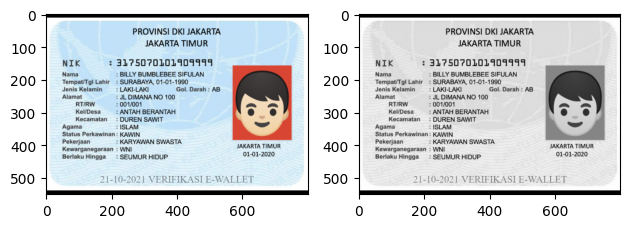

In [34]:
image = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png')
grayLightness_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):

    # mengambil nilai max dan minimum RGB
    r, g, b = image[y, x]
    max_rgb = max(r,g,b)
    min_rgb = min(r,g,b)

    # menghitung nilai ligthness
    lightness = max_rgb//2 + min_rgb//2

    grayLightness_image[y, x] = lightness


# final_frame = cv.hconcat((image, grayLightness_image))
# cv2_imshow(final_frame)

image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image2)

grayLightness_image2 = cv2.cvtColor(grayLightness_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(grayLightness_image2)

plt.tight_layout()
plt.show()


### Luminance

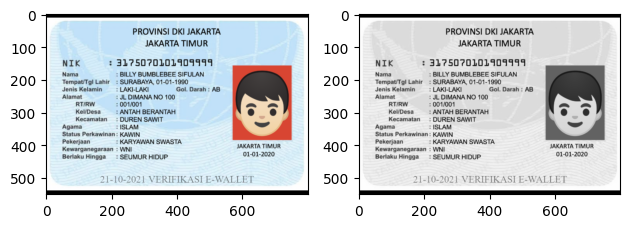

In [29]:
image = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png')
grayLuminance_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      red = image[y,x,2]
      green = image[y,x,1]
      blue = image[y,x,0]

      luminance = 0.21*red + 0.72*green + 0.07*blue
      grayLuminance_image[y,x,c] = np.clip(luminance, 0, 255)


# final_frame = cv.hconcat((image, grayLuminance_image))
# cv2_imshow(final_frame)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image2)

grayLuminance_image2 = cv2.cvtColor(grayLuminance_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(grayLuminance_image2)

plt.tight_layout()
plt.show()


####5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

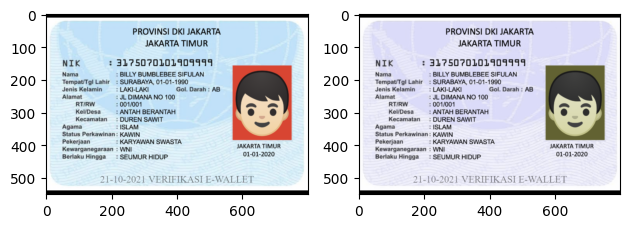

In [35]:
image = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png')
grayLuminance_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      red = image[y,x,2]
      green = image[y,x,1]
      blue = image[y,x,0]

      luminance = 0.21*red + 0.72*green + 0.07*blue
      grayLuminance_image[y,x,2] = np.clip(luminance, 0, 255)
      grayLuminance_image[y,x,1] = np.clip(luminance, 0, 255)
      grayLuminance_image[y,x,0] = blue


# final_frame = cv.hconcat((image, grayLuminance_image))
# cv2_imshow(final_frame)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image2)

grayLuminance_image2 = cv2.cvtColor(grayLuminance_image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(grayLuminance_image2)

plt.tight_layout()
plt.show()